**DIGIT**

In [2]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten

In [32]:
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

In [33]:
X_test.shape

(10000, 28, 28)

In [34]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

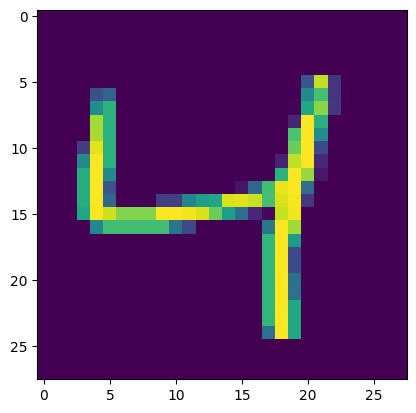

In [36]:
import matplotlib.pyplot as plt
plt.imshow(X_train[2])

In [37]:
X_train = X_train/255
X_test = X_test/255

In [38]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [39]:
model = Sequential()

model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [40]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 128)               100480    
                                                                 
 dense_7 (Dense)             (None, 32)                4128      
                                                                 
 dense_8 (Dense)             (None, 10)                330       
                                                                 
Total params: 104,938
Trainable params: 104,938
Non-trainable params: 0
_________________________________________________________________


In [41]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [42]:
history = model.fit(X_train,y_train,epochs=25,validation_split=0.2)

Epoch 1/25
1500/1500 [==============================] - 10s 6ms/step - loss: 0.2865 - accuracy: 0.9190 - val_loss: 0.1462 - val_accuracy: 0.9573
Epoch 2/25
1500/1500 [==============================] - 10s 7ms/step - loss: 0.1219 - accuracy: 0.9643 - val_loss: 0.1195 - val_accuracy: 0.9646
Epoch 3/25
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0825 - accuracy: 0.9745 - val_loss: 0.1096 - val_accuracy: 0.9672
Epoch 4/25
1500/1500 [==============================] - 10s 7ms/step - loss: 0.0621 - accuracy: 0.9806 - val_loss: 0.1090 - val_accuracy: 0.9697
Epoch 5/25
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0481 - accuracy: 0.9847 - val_loss: 0.0955 - val_accuracy: 0.9741
Epoch 6/25
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0365 - accuracy: 0.9882 - val_loss: 0.0979 - val_accuracy: 0.9728
Epoch 7/25
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0310 - accuracy: 0.9899 - val_loss: 0.1166 - val_accura

In [43]:
y_prob = model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [44]:
y_pred = y_prob.argmax(axis=1)

In [45]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9735

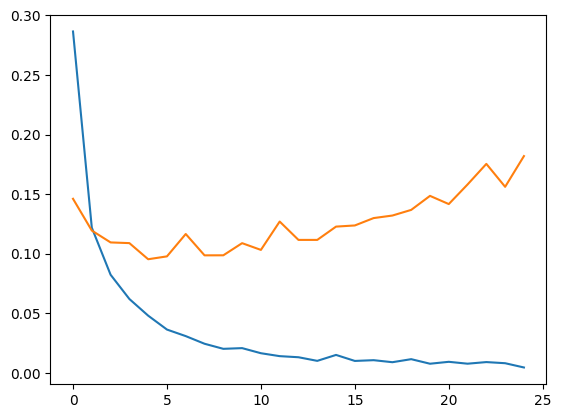

In [46]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [47]:
model.loss

'sparse_categorical_crossentropy'

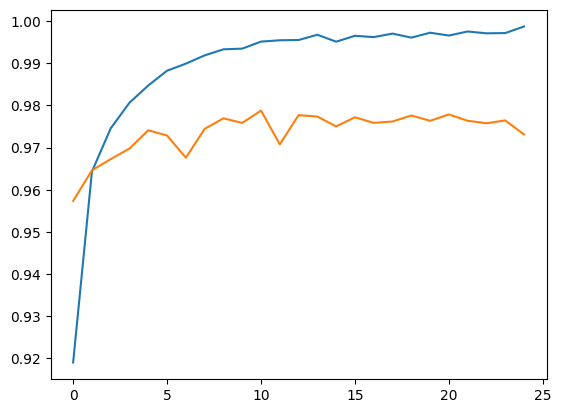

In [48]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

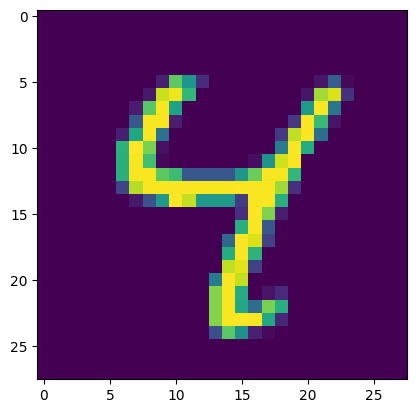

In [49]:
plt.imshow(X_test[6])

In [50]:
model.predict(X_test[6].reshape(1,28,28)).argmax(axis=1)

1/1 [==============================] - 0s 24ms/step


array([4])

In [52]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 3s 8ms/step - loss: 0.1579 - accuracy: 0.9735


[0.1578996777534485, 0.9735000133514404]

In [53]:
model.evaluate(X_train,y_train)

1875/1875 [==============================] - 6s 3ms/step - loss: 0.0466 - accuracy: 0.9912


[0.046566810458898544, 0.9911500215530396]